In [4]:
import json
# import urllib.request
from collections import defaultdict
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import csv
import itertools
# import seaborn as sns
import math
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.draw.dispersion import dispersion_plot
from PIL import Image 
from os import path
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize

The Lord of the Rings books were downloaded as txt files from the following webistes. 

[Fellowship of the Ring](http://www.glozman.com/TextPages/01%20-%20The%20Fellowship%20Of%20The%20Ring.txt)

[The two Towers](http://www.glozman.com/TextPages/02%20-%20The%20Two%20Towers.txt)

[The return of the King](http://www.glozman.com/TextPages/03%20-%20The%20Return%20Of%20The%20King.txt)

Before starting anylysis, the text needed to be cleaned. There are three books and every book had different format than the others. From the first book there were few sections that needed to be skipped. It had table of content, foreward and prolouge, it was decided to skip these sections. Book 2 and 3 had a quicker start. 

In order to store the book information in an accessible way, a data structure was created. The data structure chosen was a list of books, where each book was a dictionary. This dictionary included things like title, number of chapters, text, cleaned text and chapters. Every chapter was also a dictionary, where each chapter had information about that chapter in the book. To be able to 

These steps were performed to clean the text:
* Underscores were removed, since the text contained a lot of them, with no meaning.
* The text was tokenized using nltk.tokenize.
* The text was set to lower-case.
* The isalpha() function was used to discard words that included something not from the alphabet a-z.
* The text was lemmatized, punctuation were skipped as well as common stopwords. Lemmatizing means linking words with similar meanings to one word. For example rocks will become rock.

2.2.1 Books

The dataset is a list containing the three books as dictionaries, where information about each book is stored. Each book has the following attributes:

- Book title.
- Number of book in the saga.
- A list of its chapters, were each chapter is a dictionary that keeps information about that chapter.
- Number of chapters.
- Cleaned text (tokenized, lower-cased, lemmatized and with stopwords removed.
- Number of words in book after word-cleaning.

For the rest of the analysis, the cleaned text will be used.

In [6]:
booknames = ["01 - The Fellowship Of The Ring.txt", 
             "02 - The Two Towers.txt", 
             "03 - The Return Of The King.txt"]

In [352]:
# stop_words = set(stopwords.words('english'))
stop_words = nltk.corpus.stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+')
wnl = nltk.WordNetLemmatizer()

# We manually add these words, since they do not bring any value
extra_stopwords = ["said", "would", "come", "came", "back", "could", "like", "go", "us", "may"]
stop_words = stop_words + extra_stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [353]:
books = [] # Keep all the dict of books here
all_clean_text = [] # Keep text of all books, for further analysis (wordcloud, semantic etc)

for idx, name in enumerate(booknames):
    
    # Open the right text file and read every line. 
    f = open(name, encoding="utf-8", errors='ignore')
    fullLines = f.readlines()
    
    lines = []
    for line in fullLines:
        if line != '\n':
            lines.append(line.strip())
            

    # Create a dictionary for the book
    book = {
        'booknumber' : idx+1,
        'title' : "",
        'chapters' : [],
        'nr_of_chapters' : 0,
        'text' : """""",
        'clean_text' : [],
        'clean_text_length' : 0
    }

    # The titles have a different location in each book 
    # The end index is set, they differ from books
    if book['booknumber'] == 1:   # Fellowship of the Ring
        book['title'] = lines[191]
        the_end_index = len(lines)-4
    elif book['booknumber'] == 2: # The Two Tower
        book['title'] = lines[30]
        the_end_index = len(lines)-3
    else:                         # Return of the King
        book['title'] = lines[28]
        the_end_index = len(lines)-1
        
    # Find all indexes where a chapter start
    chapter_starts_index = []
    for line in lines:
        if line.startswith('_Chapter'):
            chapter_starts_index.append(lines.index(line))

    # Working with each chapter
    for i in range(len(chapter_starts_index)):

        # Create a new chapter dictionary
        chapter = {
            'chapter_name' : "",
            'chapter_text' : [],
            'clean_chapter_text' : """"""
        }

        book['nr_of_chapters'] += 1

        chapter['chapter_name'] = lines[chapter_starts_index[i]+1]

        # Get text for all chapters but the last one
        if i < len(chapter_starts_index)-1: 
            # 
            text = lines[chapter_starts_index[i]+2:chapter_starts_index[i+1]]  
        else:
            # Get text for last chapter using the correct indexes
            text = lines[chapter_starts_index[i]+2:the_end_index] 

        text = ' '.join(str(t) for t in text)
        text = text.replace('_ ', ' ') # There are a lot of _ before and after sentences.
        text = text.replace(' _', ' ')
        text = text.replace('_', '') # Some of the _ do not have space before or after

        chapter['chapter_text'] = text # Add the text to the chapter-dictionary

        # Tokenize the words
        tokens = nltk.word_tokenize(text)
        
        # Put everything to lowercase and skip words that are not in from a-z (isalpha)
        words = [w.lower() for w in tokens if w.isalpha()]

        # Lemmatize the words, skip punctuation and stopwords
        clean_words = []
        for w in words:
            if w not in stop_words:
                w = wnl.lemmatize(w)
                clean_words.append(w)        
        
        # Add the clean text to the chapter-dictionary
        chapter['clean_chapter_text'] = clean_words
        
        # Add the information to the book-dictionary
        book['chapters'].append(chapter)
        book['text'] = book['text'] + text
        book['clean_text'].extend(clean_words)
        book['clean_text_length'] = len(book['clean_text'])

    # Add the book to the books list
    books.append(book)

    # Append the text to the string containing all the books
    all_clean_text.extend(book['clean_text'])


['bilbo', 'baggins', 'bag', 'end', 'announced', 'shortly', 'celebrating', 'birthday', 'party', 'special', 'magnificence', 'much', 'talk', 'excitement', 'hobbiton', 'bilbo', 'rich', 'peculiar', 'wonder', 'shire', 'sixty', 'year', 'ever', 'since', 'remarkable', 'disappearance', 'unexpected', 'return', 'rich', 'brought', 'travel', 'become', 'local', 'legend', 'popularly', 'believed', 'whatever', 'old', 'folk', 'might', 'say', 'hill', 'bag', 'end', 'full', 'tunnel', 'stuffed', 'treasure', 'enough', 'fame', 'also', 'prolonged', 'vigour', 'marvel', 'time', 'wore', 'seemed', 'little', 'effect', 'baggins', 'ninety', 'much', 'fifty', 'began', 'call', 'unchanged', 'nearer', 'mark', 'shook', 'head', 'thought', 'much', 'good', 'thing', 'seemed', 'unfair', 'anyone', 'posse', 'apparently', 'perpetual', 'youth', 'well', 'reputedly', 'inexhaustible', 'wealth', 'paid', 'natural', 'trouble', 'far', 'trouble', 'baggins', 'generous', 'money', 'people', 'willing', 'forgive', 'oddity', 'good', 'fortune', 'r

In [557]:
for book in books:
    print('Title:', book['title'])
    print('Book number:', book['booknumber'])
    print('Number of chapters:', book['nr_of_chapters'])
    print('Title of first chapter: ', book['chapters'][0]['chapter_name'])
    print('First words in book:', book['text'][:44])
    print('First words in book (cleaned):', book['clean_text'][:5])
    print('Number of words after clean-up:', book['clean_text_length'])
    print('')

Title: THE FELLOWSHIP OF THE RING
Book number: 1
Number of chapters: 22
Title of first chapter:  A Long-expected Party
First words in book: When Mr. Bilbo Baggins of Bag End announced 
First words in book (cleaned): ['bilbo', 'baggins', 'bag', 'end', 'announced']
Number of words after clean-up: 77575

Title: THE TWO TOWERS
Book number: 2
Number of chapters: 21
Title of first chapter:  The Departure of Boromir
First words in book: Aragorn sped on up the hill. Every now and a
First words in book (cleaned): ['aragorn', 'sped', 'hill', 'every', 'bent']
Number of words after clean-up: 67177

Title: THE RETURN OF THE KING
Book number: 3
Number of chapters: 19
Title of first chapter:  Minas Tirith
First words in book: Pippin looked out from the shelter of Gandal
First words in book (cleaned): ['pippin', 'looked', 'shelter', 'gandalf', 'cloak']
Number of words after clean-up: 57937



The following chapter covers the analysis conducted from the three Lord of the Rings Books. This chapter covers general statistics, temporal sentiment analysis, different types of word clouds and lexical dispersion.

In [507]:
# Read in the list of books from a json file
with open('allbooks.json') as json_file:
    books = json.load(json_file)

# General statistics

In [509]:
# Set parameters for bar plots
title, nr_of_chapters, avg_length_chapter, word_count, unique_word_count = ([] for i in range(5))

for book in books:
    title.append(book['title'])
    nr_of_chapters.append(book['nr_of_chapters'])
    avg_length_chapter.append(book['clean_text_length']/book['nr_of_chapters'])
    word_count.append(book['clean_text_length'])
    unique_word_count.append(len(set(book['clean_text'])))

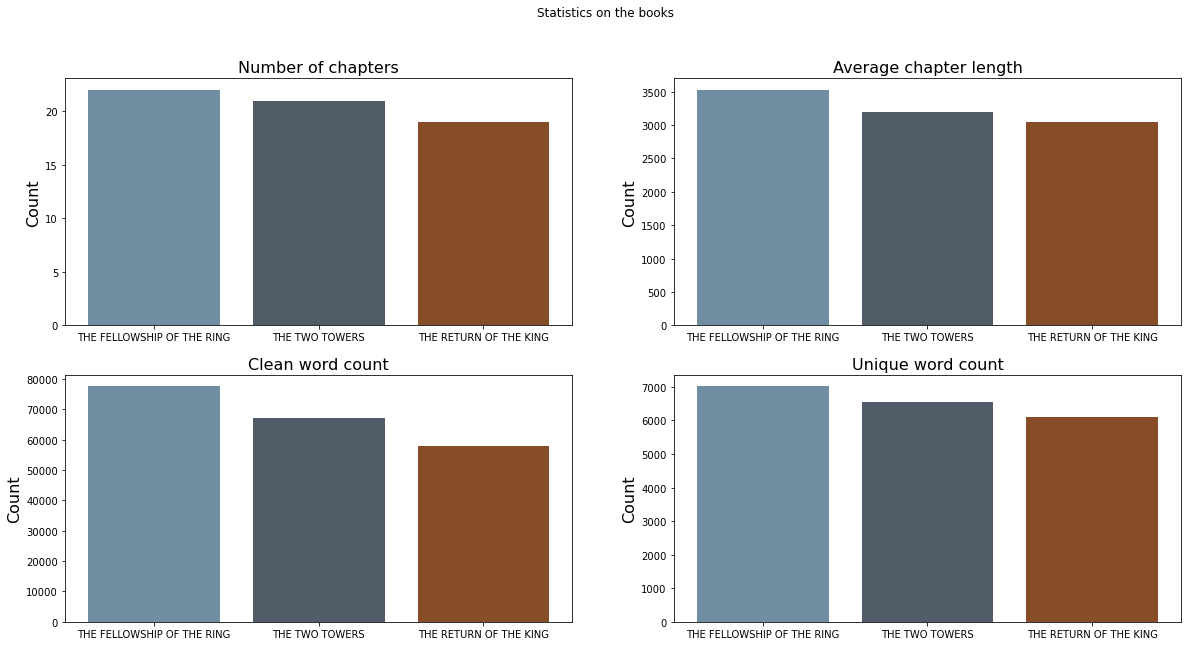

In [510]:
# Set the color palette for future use
LOTRpalette = ["#708ea2", "#515c68", "#874d28", "#5d5933", "#1e3b23", "#393835"]

fig, axs = plt.subplots(2, 2, figsize=(20,10))
plt.suptitle("Statistics on the books")

axs[0, 0].bar(title, nr_of_chapters, color=LOTRpalette)
axs[0][0].set_title('Number of chapters', fontsize=16)
axs[0][0].set_ylabel('Count', fontsize=16)

axs[0, 1].bar(title, avg_length_chapter, color=LOTRpalette)
axs[0][1].set_title('Average chapter length', fontsize=16)
axs[0][1].set_ylabel('Count', fontsize=16)

axs[1, 0].bar(title, word_count, color=LOTRpalette)
axs[1][0].set_title('Clean word count', fontsize=16)
axs[1][0].set_ylabel('Count', fontsize=16)

axs[1, 1].bar(title, unique_word_count, color=LOTRpalette)
axs[1][1].set_title('Unique word count', fontsize=16)
axs[1][1].set_ylabel('Count', fontsize=16)

plt.show()

# Lexical dispersion

An interesting part of text analysis is a lexical dispersion. This plot shows how a list of words of interests appear in the text over the three books.

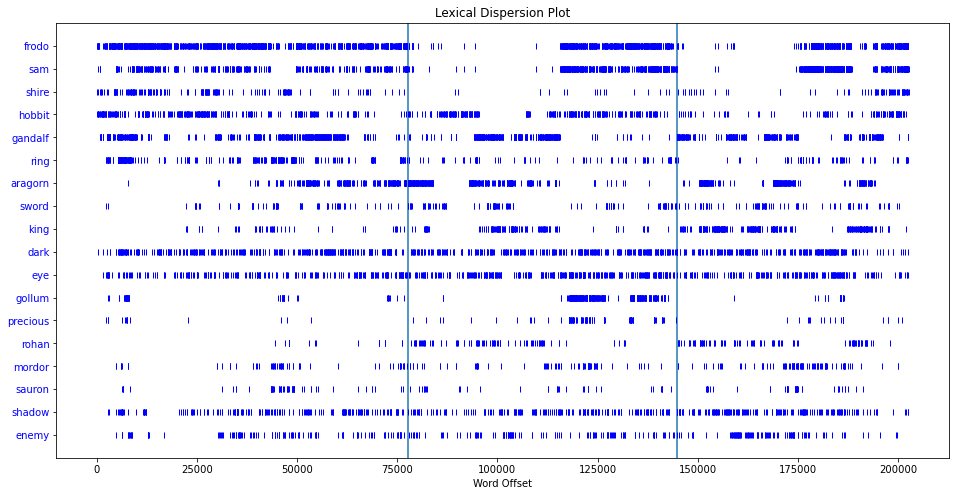

In [512]:
plt.figure(figsize=(16, 8))

# Finding indexes to create vertical lines
vertical = 0
for i in range(len(books)-1):
    vertical = len(books[i]['clean_text']) + vertical
    plt.axvline(x=vertical)

# Manually chosen words of interest
words_to_plot = ["frodo", "sam", "shire", "hobbit", "gandalf", "ring", "aragorn", "sword", "king", "dark", "eye", "gollum", "precious", "rohan", "mordor", "sauron", "shadow", "enemy"]

dispersion_plot(all_clean_text, words_to_plot, ignore_case=True, title='Lexical Dispersion Plot')

From this plot there are some interesting findings:
- Frodo is definitely the main character in the first book.
- In The Two Tower and The Return of the King, Frodo and Sam are both is significant in the second half of the books. When one is spoken about, the other is not far away.
- Gollum and the precious are often mentioned together.
- The words "dark" and "ring" are frequently mentioned over the three books. 

# Term frequency

The next analysis for the books is to find term frequency. The plan is to find the most common words for all the books, and for each book.

In [514]:
top_words = []

for book in books:
    nltk_text = nltk.Text(book['clean_text'])
    fdist = nltk.FreqDist(nltk_text)

    top_words.append(fdist.most_common(10))

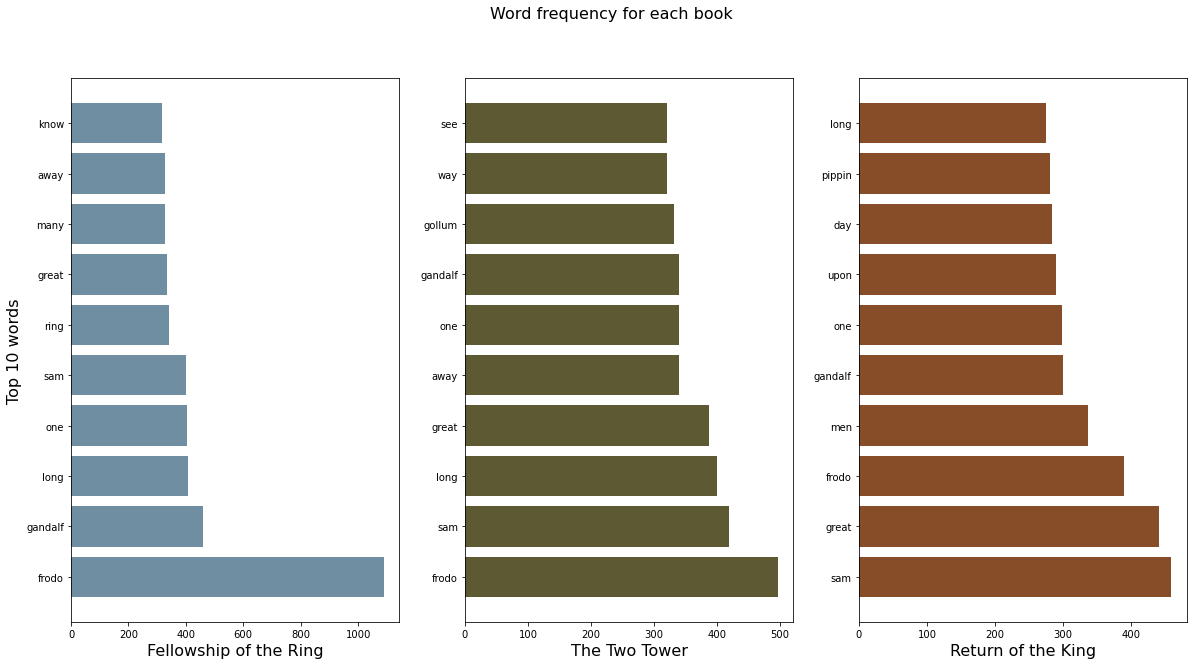

In [515]:
words = []
height = []

fig, axes = plt.subplots(1, 3, figsize=(20,10))
plt.suptitle("Word frequency for each book", fontsize=16)

for index, word in enumerate(top_words):

    for i in range(len(top_words[index])):
        words.append(top_words[index][i][0])
        height.append(top_words[index][i][1])
        

axes[0].barh(words[:10], height[:10], color=LOTRpalette[0])
axes[0].set_xlabel('Fellowship of the Ring', fontsize=16)
axes[0].set_ylabel('Top 10 words', fontsize=16)

axes[1].barh(words[10:20], height[10:20], color=LOTRpalette[3])
axes[1].set_xlabel('The Two Tower', fontsize=16)

axes[2].barh(words[20:], height[20:], color=LOTRpalette[2])
axes[2].set_xlabel('Return of the King', fontsize=16)

plt.show()

Here we can see top 10 most frequent words for each book. 

Now for the term frequency for the whole book.

In [518]:
nltk_all_books = nltk.Text(all_clean_text)
fdist_all_books = nltk.FreqDist(nltk_all_books)

# TOP 20 WORDS IN ALL BOOKS
fdist_all_books.most_common(20)

[('frodo', 1974),
 ('sam', 1278),
 ('great', 1162),
 ('gandalf', 1099),
 ('long', 1081),
 ('one', 1042),
 ('away', 925),
 ('still', 875),
 ('see', 847),
 ('upon', 832),
 ('day', 797),
 ('many', 795),
 ('far', 788),
 ('last', 786),
 ('way', 774),
 ('time', 771),
 ('dark', 759),
 ('know', 754),
 ('eye', 743),
 ('hand', 735)]

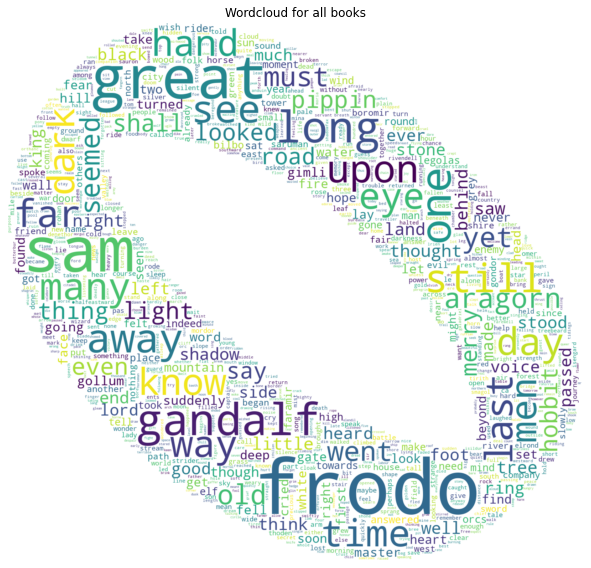

In [519]:
ring_mask = np.array(Image.open(path.join("mask/ringwhite.png")))


plt.figure(figsize=(12,8))
wordcloud = WordCloud(background_color="white", 
                      width=1000,
                      height=500,
                      max_words=1000,
                      mask=ring_mask).generate_from_frequencies(fdist_all_books)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud for all books")
plt.tight_layout()
plt.show()

# TC-IDF

A TF-IDF (term frequency â€“ inverse document frequency) is is intended to reflect how important a word is to that specific book, compared to the other in the series.

TF = number of times word appears in book / number of words in book.
IDF = log(number of books / number of book containing word)

Since the books are only three, and they are all the same story - similar words used over the book series. Which means the IDF value is very low. 

For this reason it was decided to use TC-IDF instead of TF-IDF. Since normalizing words in each book made their value so small, that when multiplied with the IDF the outcome did not result in a meaningful wordcloud.

In [522]:
def calcTCIDF(theBook, appearsInBooks):
    wordsInBook = defaultdict(list)
    superstring = ""

    nltk_book = nltk.Text(theBook['clean_text'])
    fdist_book = nltk.FreqDist(nltk_book)

    # Looping through every word in this book and write to dict how many times they appear in this book
    for word in fdist_book:
        wordTC = fdist_book[word]
        wordsInBook[word].append(wordTC)

    # Looping over the dict which contains term and a count how often it appears in this book.
    for term, count in wordsInBook.items():
        TC = sum(count)
#         TF = TC / theBook['clean_text_length']

        IDF = np.log(3 / len(appearsInBooks[term]))

        TCIDF = math.ceil(TC*IDF)
        
        # Write the word to a large string, each word is written as many times to the string as its TC-IDF score.
        superstring += (term + " ") * TCIDF
    
    # Return a long string that contains words that are important to that book
    return superstring

In [523]:
appearsInBooks = defaultdict(list)

# Looping through the books and count in how many books each words appears
for book in books:
    nltk_book = nltk.Text(book['clean_text'])
    fdist_for_all_books = nltk.FreqDist(nltk_book)
    
    for word in fdist_for_all_books:
        appearsInBooks[word].append(book['title'])

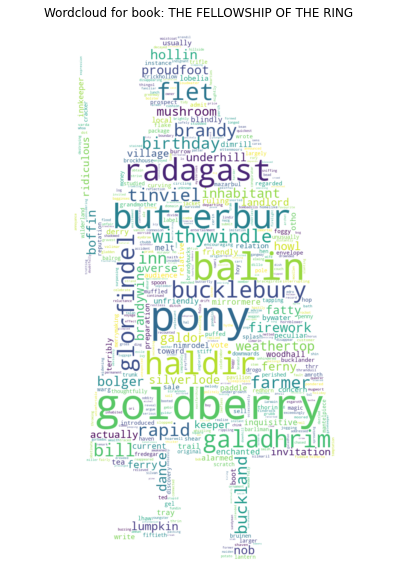

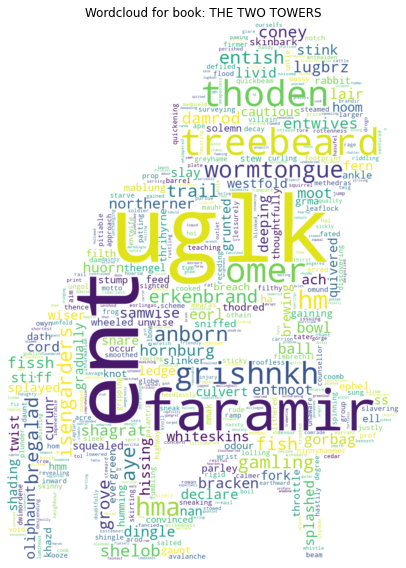

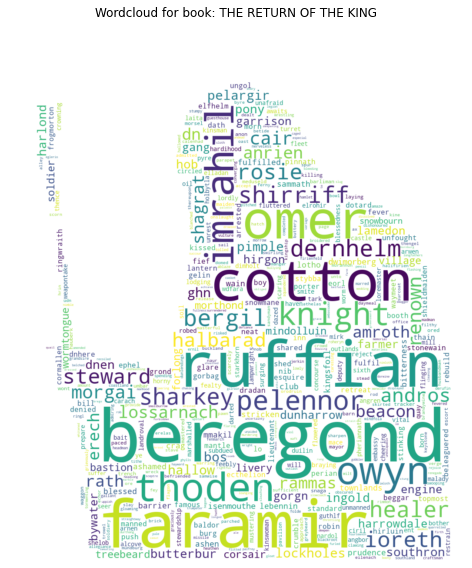

In [524]:
frodo_mask = np.array(Image.open(path.join("mask/frodo.png")))
gollum_mask = np.array(Image.open(path.join("mask/gollum.png")))
gandalf_mask = np.array(Image.open(path.join("mask/gandalf.png")))
maskList = [frodo_mask, gollum_mask, gandalf_mask]

# Loop through all the books
for index, book in enumerate(books):

    plt.figure(figsize=(10,8))

    bookCloud = calcTCIDF(book, appearsInBooks)


    wordcloud = WordCloud(background_color="white",
                          collocations=False,
                          width=2000,
                          height=1000,
                          max_words=500,
                          mask=maskList[index]
                         ).generate(bookCloud)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Wordcloud for book: %s" %book['title'])

    
    plt.tight_layout()
    plt.show()

Even though similar words are used all over the book series, we can see some meaningful words for each book.
- In The Fellowship of the Ring there are some unique words like Goldberry, pony, Bucklebury and Mr. Butterbur.
- In The Two Towers Ent (the talking tree) and Ugl'k (an orc) are frequently mentioned.
- In The Return of the King there are characters that are not mentioned in other books, like Ruffian, Beregond and Imrahil.

# Sentiment analysis

In this section a temporal sentiment analysis will be made. First a sentiment score for each book, and later a sentiment score for each chapter, which will show the development of sentiment over the book series.

A sentiment plot shows different sentiment scores for each chapter, depending on how positive or negative the chapter is.

When calculating sentiment score, it was decided to use a frequency distribution of a certain text. The sentiment score for each word was found, and then multiplied with it's frequency in the text. The average score is then found with total score of all words, divided by number of words with score in text. Since not all words have a sentiment score, words like Frodo are neutral and therefore do not affect the analysis.

In [527]:
def calcSentiment(text):
    nltk_text = nltk.Text(text)
    fdist_words = nltk.FreqDist(nltk_text)
    scores = []

    totalScore = 0
    wordCountWithScore = 0

    for index, word in enumerate(fdist_words):
        vs = analyzer.polarity_scores(word)
        scores.append(vs['compound'])
        
        if scores[index] != 0:
            totalScore += scores[index] * fdist_words[word]
            wordCountWithScore += fdist_words[word]

    average = totalScore/wordCountWithScore
    return average

In [528]:
averageBookSentiment = []
for book in books:
    averageBookSentiment.append(calcSentiment(book['clean_text']))

    
averageChapterSentiment = []
for book in books:
    for index, chapter in enumerate(book['chapters']):
        averageChapterSentiment.append(calcSentiment(book['chapters'][index]['clean_chapter_text']))

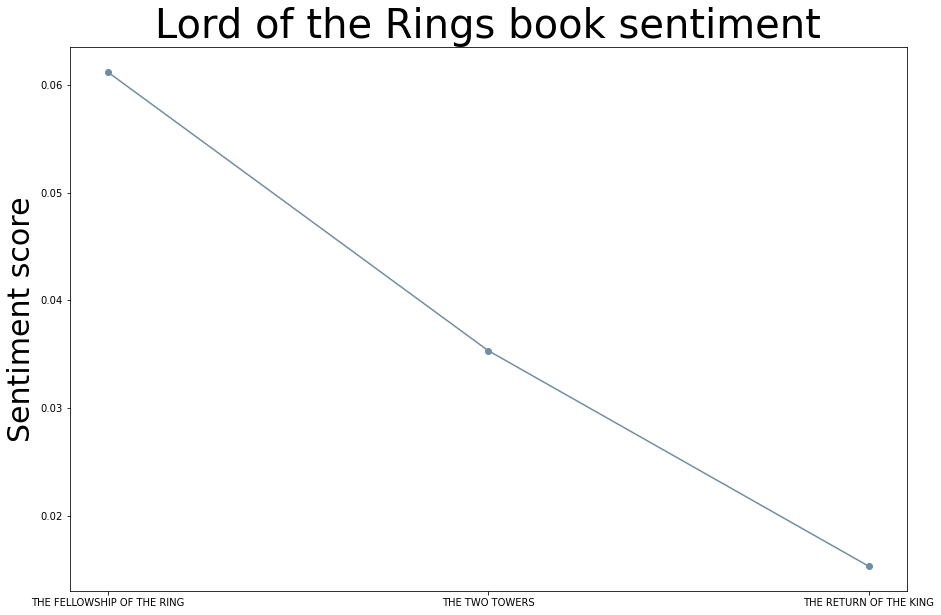

In [554]:
plt.figure(figsize=(15,10))
# plt.title('Vader Sentimental analysis')

plt.plot(title, averageBookSentiment, 'o-', color=LOTRpalette[0])
plt.title('Lord of the Rings book sentiment', fontsize=40)
plt.ylabel('Sentiment score', fontsize=30)

plt.savefig("sentiment_all_books.png")
plt.show()


In this sentimental plot, we see how the sentimental score goes down between books. This is understandable as the story gets darker and darker. But even though the book's sentiment score goes down, it is on average always above 0, so it can be said that the Lord of the Rings book series is a positive one.

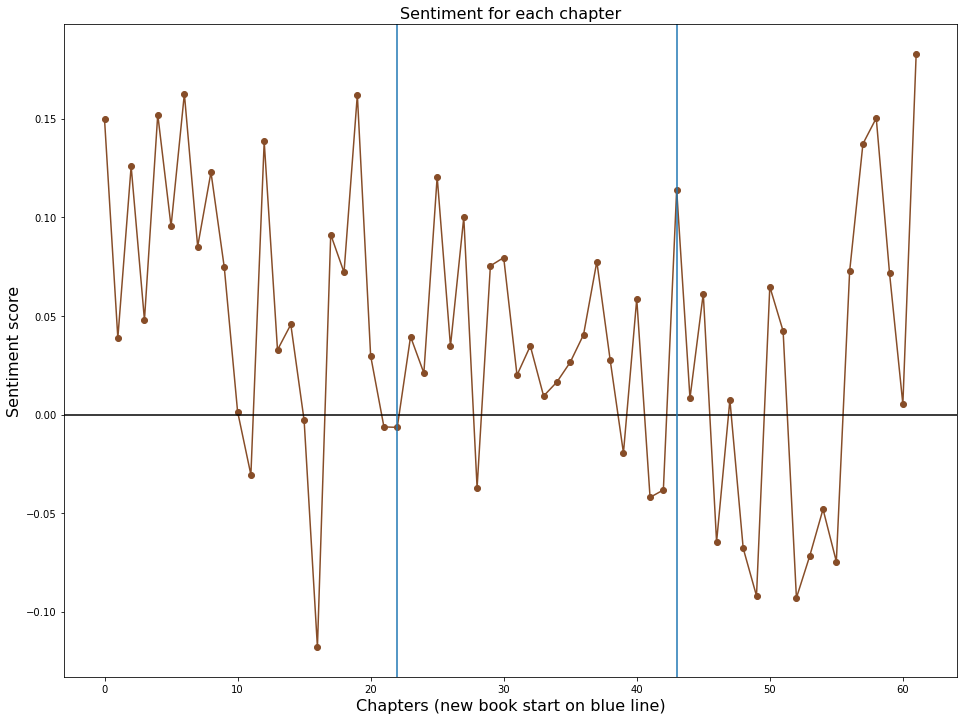

In [551]:
plt.figure(figsize=(16,12))

plt.plot(range(len(averageChapterSentiment)), averageChapterSentiment, 'o-', color=LOTRpalette[2])
plt.title('Sentiment for each chapter', fontsize=16)
plt.ylabel('Sentiment score', fontsize=16)
plt.xlabel('Chapters (new book start on blue line)', fontsize=16)

plt.axhline(y=0, color='black', linestyle='-')

# Finding indexes to create horizontal lines
horizontal = 0
# The [:-1] is only used to get rid of the a horizontal line for the last book
for book in books[:-1]:
    horizontal = book['nr_of_chapters'] + horizontal
    plt.axvline(x=horizontal)
    
plt.show()

In this sentimental plot, we see how chapters differ in average sentiment score. Chapter 1 (A Long-expected Party) is quite happy while chapter 17 (The Bridge of Khazad-dum) is the most negative chapter of the series. Here are our main characters are inside Moria, and Gandalf memorably falls of the bridge, after Balrog snatched him down. Quite dark stuff.

It is also noticable that the difference between the two last chapters is very positive.

Old stuff from here and down. Not used in website.

In [27]:
#Create DataFrame and read all attributes from csv
df_characters = pd.DataFrame()
df_characters = pd.read_csv("characters.csv")
df_characters = df_characters.drop("Unnamed: 0", axis=1)

# Getting names of all characters in the csv
names = df_characters.Name.values

In [8]:
# Writing the list of books to csv file
# https://stackoverflow.com/questions/3086973/how-do-i-convert-this-list-of-dictionaries-to-a-csv-file
with open('books.csv', 'w', encoding='utf8', newline='') as output_file:
    fc = csv.DictWriter(output_file, 
                        fieldnames=books[0].keys()
                       )
    fc.writeheader()
    fc.writerows(books)

In [556]:
for i in range(len(books)):
    print("Book number: ", books[i]['booknumber'])
    print("Book name: ", books[i]['title'])
    print("Number of chapters: ", books[i]['nr_of_chapters'])
    print("Number of words after clean-up: ", books[i]['clean_text_length'])
    print("Number of characters: ", len(books[i]['text']))
    print("Number of unique words (clean): ", len(set(books[i]['clean_text'])), "\n")

Book number:  1
Book name:  THE FELLOWSHIP OF THE RING
Number of chapters:  22
Number of words after clean-up:  77575
Number of characters:  942327
Number of unique words (clean):  7012 

Book number:  2
Book name:  THE TWO TOWERS
Number of chapters:  21
Number of words after clean-up:  67177
Number of characters:  815460
Number of unique words (clean):  6555 

Book number:  3
Book name:  THE RETURN OF THE KING
Number of chapters:  19
Number of words after clean-up:  57937
Number of characters:  708444
Number of unique words (clean):  6091 



In [486]:
# Create a json file with all books for further usage
with open('allbooks.json', 'w') as fout:
    json.dump(books, fout)

In [354]:
nltk_all_books = nltk.Text(all_clean_text)
fdist_all_books = nltk.FreqDist(nltk_all_books)

# TOP 20 WORDS IN ALL BOOKS
fdist_all_books.most_common(20)

[('frodo', 1974),
 ('sam', 1278),
 ('great', 1162),
 ('gandalf', 1099),
 ('long', 1081),
 ('one', 1042),
 ('away', 925),
 ('still', 875),
 ('see', 847),
 ('upon', 832),
 ('day', 797),
 ('many', 795),
 ('far', 788),
 ('last', 786),
 ('way', 774),
 ('time', 771),
 ('dark', 759),
 ('know', 754),
 ('eye', 743),
 ('hand', 735)]

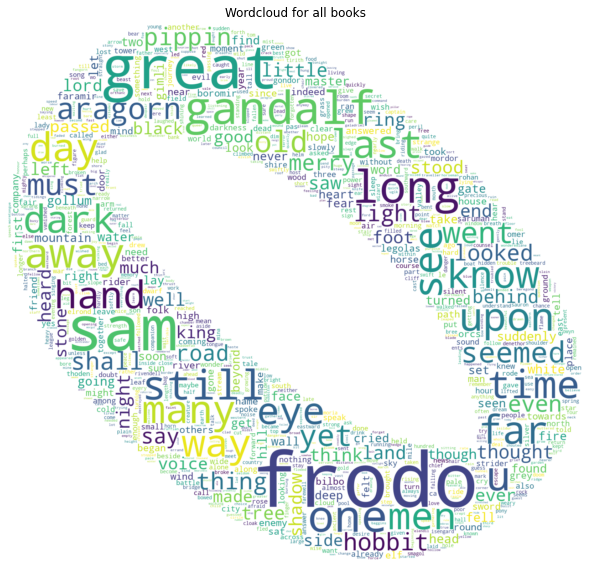

In [256]:
ring_mask = np.array(Image.open(path.join("mask/ringwhite.png")))


plt.figure(figsize=(12,8))
wordcloud = WordCloud(background_color="white", 
                      width=1000,
                      height=500,
                      max_words=1000,
                      mask=ring_mask).generate_from_frequencies(fdist_all_books)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud for all books")
plt.tight_layout()
plt.show()


In [525]:
# Calculate TF-IDF ranking
def calcTFIDF(theBook, appearsInBooks):
    wordsInBook = defaultdict(list)
    superstring = ""

    nltk_book = nltk.Text(theBook['clean_text'])
    fdist_book = nltk.FreqDist(nltk_book)

    # Looping through every word in this book and write to dict how many times they appear in this book
    for word in fdist_book:
        wordTC = fdist_book[word]
        wordsInBook[word].append(wordTC)

    # Looping over the dict which contains term and a count how often it appears in this book.
    for term, count in wordsInBook.items():
        TC = sum(count)
#         TF = TC / theBook['clean_text_length']

        IDF = np.log(3 / len(appearsInBooks[term]))

        TFIDF = math.ceil(TC*IDF)

        
        superstring += (term + " ") * TFIDF
    
    # Return a long string that contains words that are important to that book
    return superstring

In [286]:
appearsInBooks = defaultdict(list)

# Looping through the books and count in how many books each words appears
for book in books:
    nltk_book = nltk.Text(book['clean_text'])
    fdist_for_all_books = nltk.FreqDist(nltk_book)
    
    for word in fdist_for_all_books:
        appearsInBooks[word].append(book['title'])

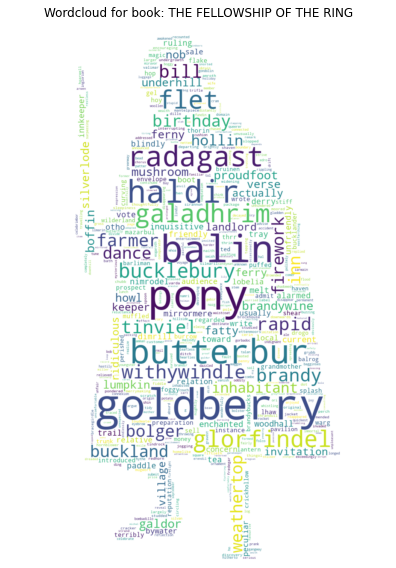

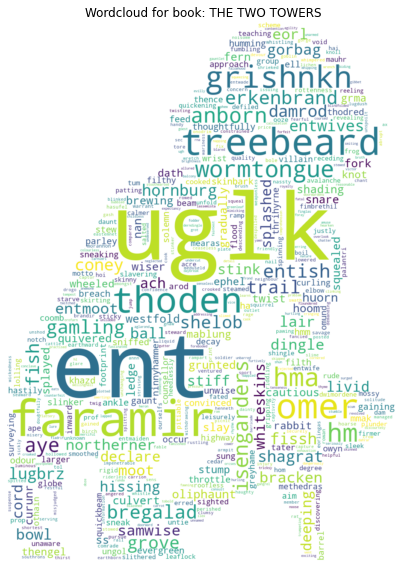

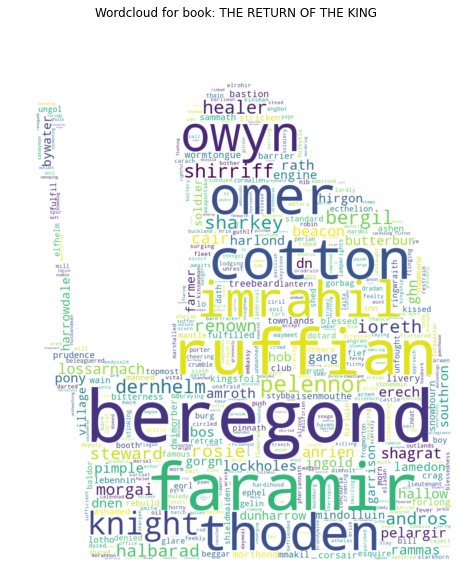

In [526]:
frodo_mask = np.array(Image.open(path.join("mask/frodo.png")))
gollum_mask = np.array(Image.open(path.join("mask/gollum.png")))
gandalf_mask = np.array(Image.open(path.join("mask/gandalf.png")))
maskList = [frodo_mask, gollum_mask, gandalf_mask]

# Loop through all the books
for index, book in enumerate(books):
#     plt.subplot(3, 1, index+1)
    plt.figure(figsize=(10,8))

    bookCloud = calcTFIDF(book, appearsInBooks)


    wordcloud = WordCloud(background_color="white",
                          collocations=False,
                          width=2000,
                          height=1000,
                          max_words=500,
                          mask=maskList[index]
                         ).generate(bookCloud)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Wordcloud for book: %s" %book['title'])

    
    plt.tight_layout()
    plt.show()

In [336]:
# Set parameters for bar plots
title, nr_of_chapters, avg_length_chapter, word_count, unique_word_count = ([] for i in range(5))

for i in range(len(books)):
    title.append(books[i]['title'])
    nr_of_chapters.append(books[i]['nr_of_chapters'])
    avg_length_chapter.append(books[i]['clean_text_length']/books[i]['nr_of_chapters'])
    word_count.append(books[i]['clean_text_length'])
    unique_word_count.append(len(set(books[i]['clean_text'])))

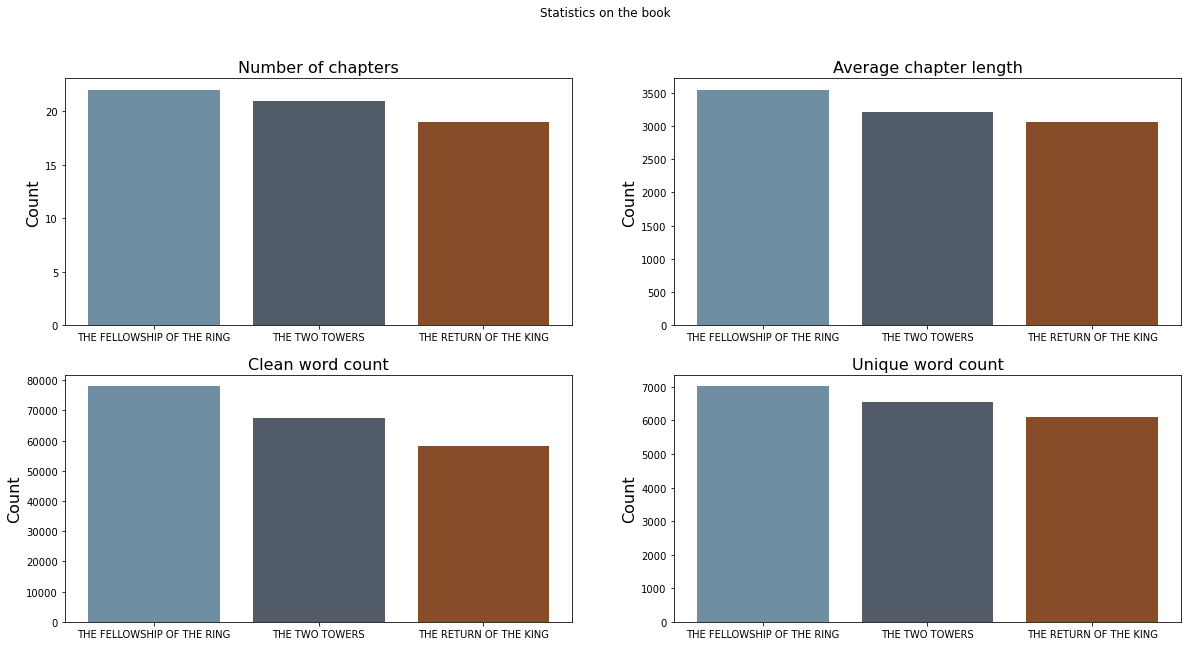

In [337]:
LOTRpalette = ["#708ea2", "#515c68", "#874d28", "#5d5933", "#1e3b23", "#393835"]

fig, axs = plt.subplots(2, 2, figsize=(20,10))
plt.suptitle("Statistics on the books")

axs[0, 0].bar(title, nr_of_chapters, color=LOTRpalette)
axs[0][0].set_title('Number of chapters', fontsize=16)
axs[0][0].set_ylabel('Count', fontsize=16)

axs[0, 1].bar(title, avg_length_chapter, color=LOTRpalette)
axs[0][1].set_title('Average chapter length', fontsize=16)
axs[0][1].set_ylabel('Count', fontsize=16)

axs[1, 0].bar(title, word_count, color=LOTRpalette)
axs[1][0].set_title('Clean word count', fontsize=16)
axs[1][0].set_ylabel('Count', fontsize=16)

axs[1, 1].bar(title, unique_word_count, color=LOTRpalette)
axs[1][1].set_title('Unique word count', fontsize=16)
axs[1][1].set_ylabel('Count', fontsize=16)

plt.show()

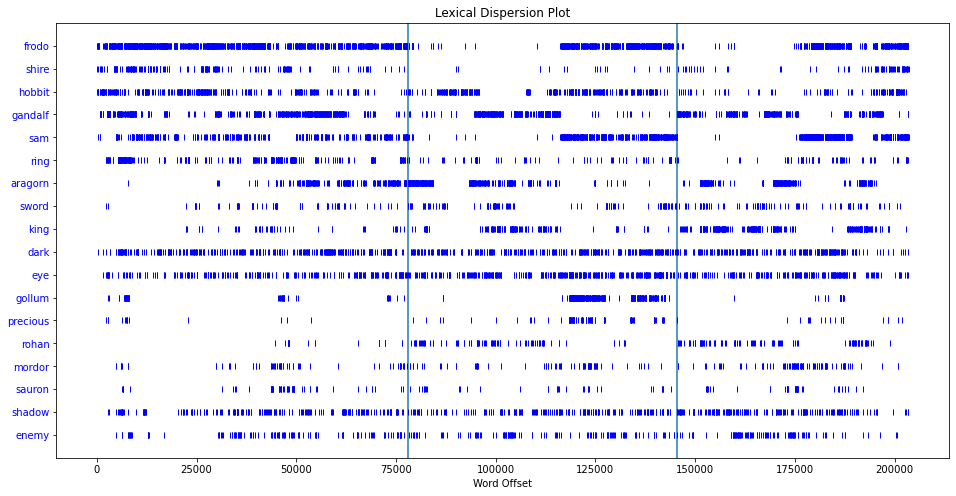

In [338]:
plt.figure(figsize=(16, 8))

# color=LOTRpalette

# Finding indexes to create vertical lines
vertical = 0
for i in range(len(books)-1):
    vertical = len(books[i]['clean_text']) + vertical
    plt.axvline(x=vertical)


words_to_plot = ["frodo", "shire", "hobbit", "gandalf", "sam", "ring", "aragorn", "sword", "king", "dark", "eye", "gollum", "precious", "rohan", "mordor", "sauron", "shadow", "enemy"]

dispersion_plot(all_clean_text, words_to_plot, ignore_case=True, title='Lexical Dispersion Plot')

## Sentimental analysis

In [339]:
def calcSentiment(text):
    nltk_text = nltk.Text(text)
    fdist_words = nltk.FreqDist(nltk_text)
    scores = []

    totalScore = 0
    wordCountWithScore = 0

    for index, word in enumerate(fdist_words):
        vs = analyzer.polarity_scores(word)
        scores.append(vs['compound'])
        
        if scores[index] != 0:
            totalScore += scores[index] * fdist_words[word]
            wordCountWithScore += fdist_words[word]

    average = totalScore/wordCountWithScore
    return average

In [340]:
averageBookSentiment = []

for book in books:
    averageBookSentiment.append(calcSentiment(book['clean_text']))

In [558]:
averageChapterSentiment = []

for book in books:
    for index, chapter in enumerate(book['chapters']):
        averageChapterSentiment.append(calcSentiment(book['chapters'][index]['clean_chapter_text']))

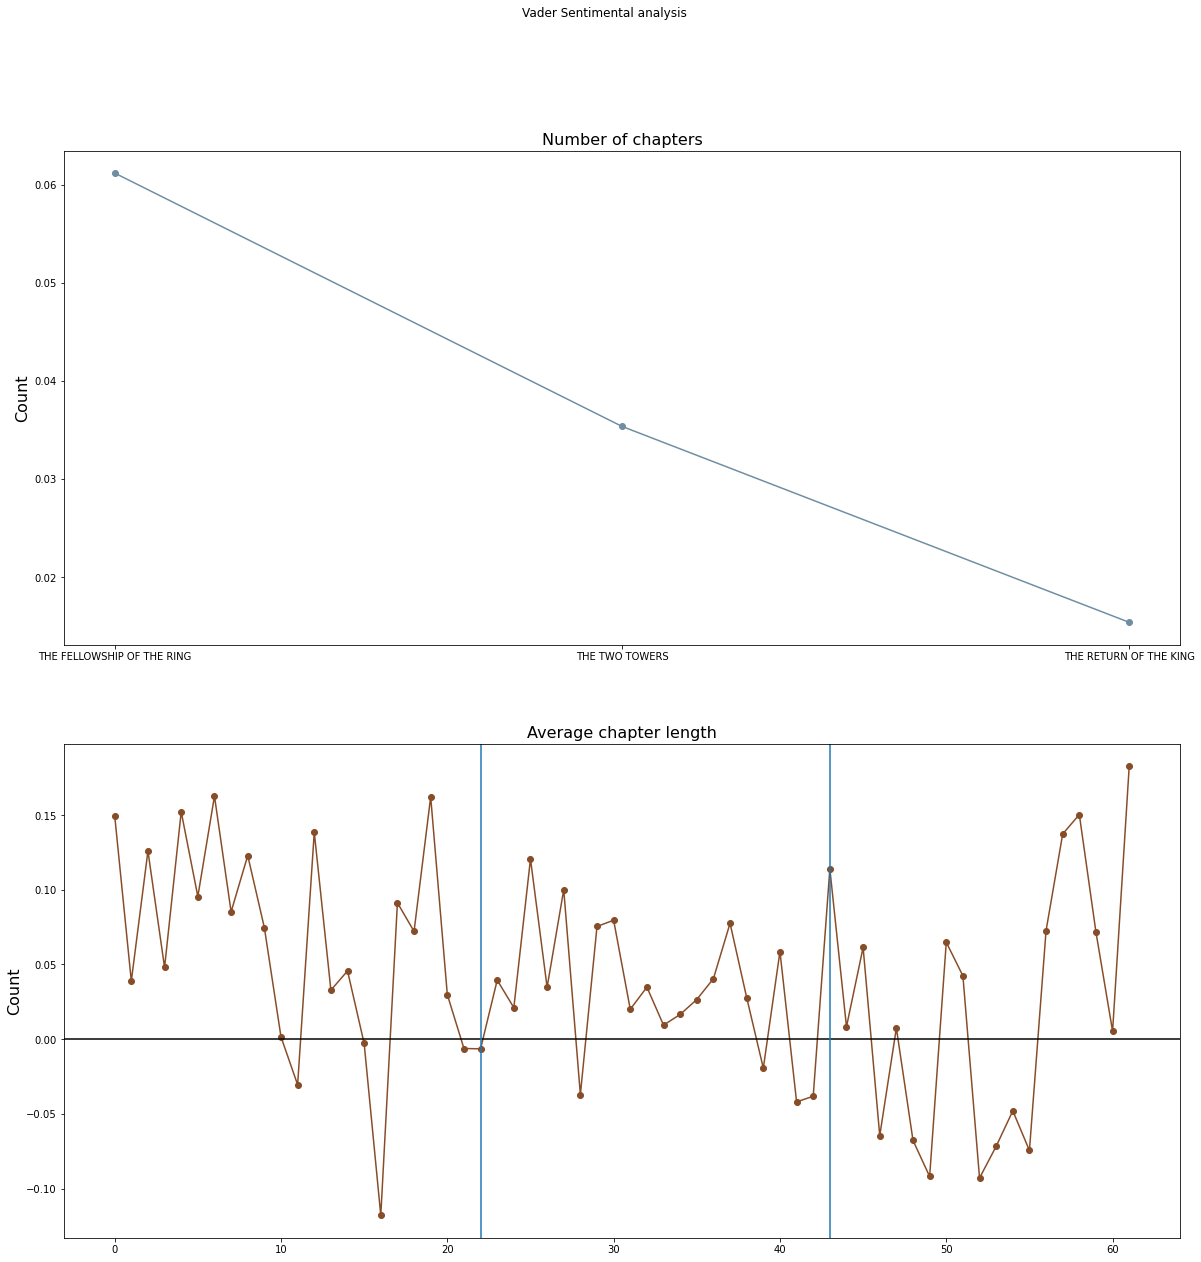

In [342]:
fig, axs = plt.subplots(2, figsize=(20,20))
fig.suptitle('Vader Sentimental analysis')

axs[0].plot(title, averageBookSentiment, 'o-', color=LOTRpalette[0])
axs[0].set_title('Number of chapters', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)

axs[1].plot(range(len(averageChapterSentiment)), averageChapterSentiment, 'o-', color=LOTRpalette[2])
axs[1].set_title('Average chapter length', fontsize=16)
axs[1].set_ylabel('Count', fontsize=16)

plt.axhline(y=0, color='black', linestyle='-')

# Finding indexes to create horizontal lines
horizontal = 0
# The [:-1] is only used to get rid of the a horizontal line for the last book
for book in books[:-1]:
    horizontal = book['nr_of_chapters'] + horizontal
    plt.axvline(x=horizontal)
    
plt.show()

In [478]:
top_words = []

for book in books:
    nltk_text = nltk.Text(book['clean_text'])
    fdist = nltk.FreqDist(nltk_text)

    top_words.append(fdist.most_common(10))

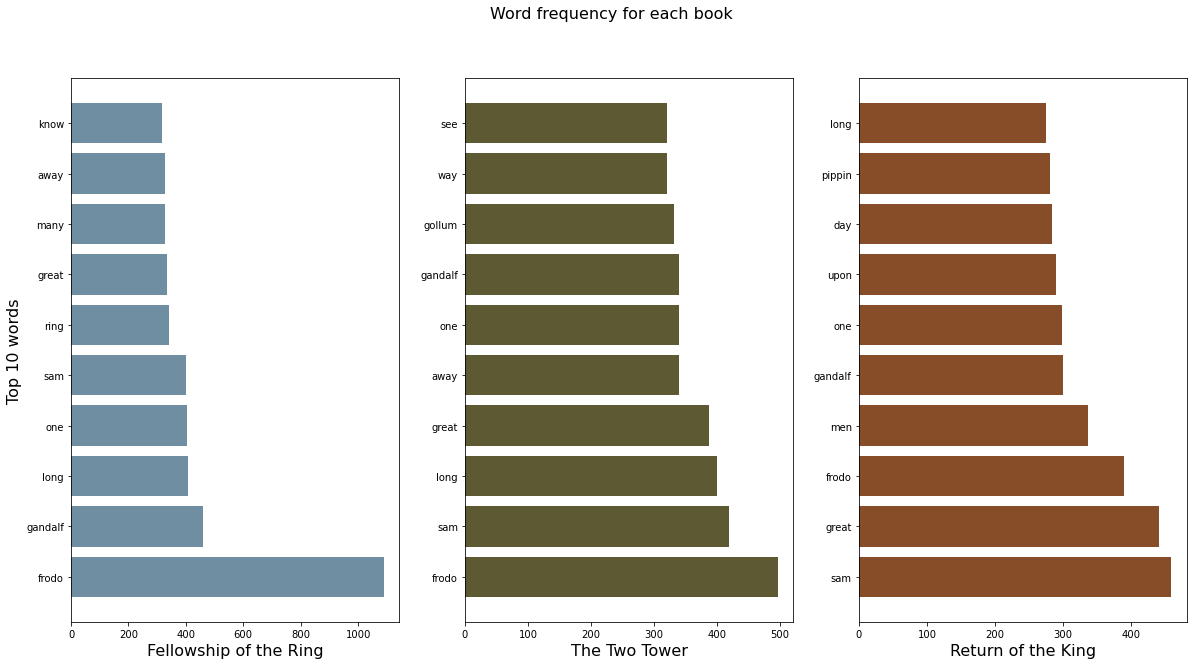

In [477]:
words = []
height = []

fig, axes = plt.subplots(1, 3, figsize=(20,10))
plt.suptitle("Word frequency for each book", fontsize=16)

for index, word in enumerate(top_words):

    for i in range(len(top_words[index])):
        words.append(top_words[index][i][0])
        height.append(top_words[index][i][1])
        

axes[0].barh(words[:10], height[:10], color=LOTRpalette[0])
axes[0].set_xlabel('Fellowship of the Ring', fontsize=16)
axes[0].set_ylabel('Top 10 words', fontsize=16)

axes[1].barh(words[10:20], height[10:20], color=LOTRpalette[3])
axes[1].set_xlabel('The Two Tower', fontsize=16)

axes[2].barh(words[20:], height[20:], color=LOTRpalette[2])
axes[2].set_xlabel('Return of the King', fontsize=16)

plt.show()